In [1]:
from manim import *
from typing import Sequence

Manim Community v0.12.0

In [2]:
class Current(VGroup):
    def __init__(
        self, point: Sequence[float] = ORIGIN, magnitude=1, direction=OUT, **kwargs
    ):
        if np.all(direction == OUT) or np.all(direction == IN):
            self.direction = direction
        else:
            raise ValueError("only IN and OUT are supported.")
        self.magnitude = magnitude
        if np.all(direction == IN):
            label = VGroup(
                Line(ORIGIN, UR).move_to(ORIGIN),
                Line(ORIGIN, UL).move_to(ORIGIN),
            )
            self.magnitude *= -1
        else:
            label = Dot(radius=0.2)
        super().__init__(**kwargs)
        self.add(Circle(color=WHITE), label).scale(0.2).shift(point)


class MyField(ArrowVectorField):
    def __init__(self, *currents: Current, **kwargs):
        super().__init__(lambda p: self.field_func(p, *currents), **kwargs)

    def field_func(self, p, *currents):
        direction = np.zeros(3)
        pos = []
        for current in currents:
            p0 = current.get_center()
            pos.append(p0)
            mag = current.magnitude
            x, y, z = p - p0
            
            dist = (x ** 2 + y ** 2) ** 3
            if any((p - p0) ** 2 > 0.05):
                direction += mag * np.array([- y / dist, x / dist, 0])

        return direction

In [3]:
%%manim -qh -v WARNING MyExampleScene
from manim import *

class MyExampleScene(Scene):         
    def construct(self):
        current1 = Current(LEFT * 2.5)
        current2 = Current(RIGHT * 2.5, direction=IN)
        field = MyField(current1, current2)
        self.add(field, current1, current2)
        
        func = lambda p: field.field_func(p)
    
        stream_lines = StreamLines(func, stroke_width=3, max_anchors_per_line=30)
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=1.5)
        self.wait(2)

In [6]:
%%manim -qh -v WARNING MyExampleScene
from manim import *

class MyExampleScene(Scene):         
    def construct(self):
        current1 = Current(LEFT * 2.5)
        current2 = Current(RIGHT * 2.5, direction=IN)
        field = MyField(current1, current2)
        func = lambda p: field.field_func(p)
    
        stream_lines = StreamLines(func, stroke_width=3, max_anchors_per_line=30)
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=1.5)
        self.wait(2)

In [78]:
class Charge(VGroup):
    def __init__(self, magnitude=1, point=ORIGIN, add_glow=True, **kwargs):
        VGroup.__init__(self, **kwargs)
        self.magnitude = magnitude
        self.point = point
        self.radius = (abs(magnitude) * 0.4 if abs(magnitude) < 2 else 0.8) * 0.3

        if magnitude > 0:
#             label = VGroup(
#                 Rectangle(width=0.32 * 1.1, height=0.006 * 1.1).set_z_index(1),
#                 Rectangle(width=0.006 * 1.1, height=0.32 * 1.1).set_z_index(1),
#             )
#             color = RED
#             layer_colors = [RED_D, RED_A]
#             layer_radius = 4
            label = Dot(radius=0.2)
        else:
            label = VGroup(
                Line(ORIGIN, UR).move_to(ORIGIN),
                Line(ORIGIN, UL).move_to(ORIGIN),
            )

#         self.add(Dot(point=self.point, radius=self.radius, color=color))
#         self.add(Dot(point=self.point, radius=self.radius))
        self.add(Circle(color=WHITE), label).scale(0.2).shift(point)
        for mob in self:
            mob.set_z_index(1)


class MagneticField(ArrowVectorField):
    def __init__(self, *charges: Charge, **kwargs):
        self.charges = charges
        super().__init__(
            lambda p: self.field_func(p),
            **kwargs
        )

    def field_func(self, p):
        direction = np.zeros(3)
        pos = []
        for charge in self.charges:
            p0, mag = charge.get_center(), charge.magnitude
            pos.append(p0)
            x, y, z = p - p0
            dist = (x ** 2 + y ** 2) ** 1.5
            if any((p - p0) ** 2 >= 0.25):
                direction += mag * np.array([- y / dist, x / dist, 0])
        for p0 in pos:
            if all((p - p0) ** 2 < 0.25):
                direction = np.zeros(3)
        return direction

In [12]:
%%manim -qh -v WARNING ElectricFieldExampleScene

class ElectricFieldExampleScene(Scene):
    def construct(self):
        charge1 = Charge(2, LEFT*2.5)
        charge2 = Charge(-2, RIGHT*2.5)
        field = ElectricField(charge1, charge2)
        self.add(charge1)
        self.add(charge2)
        self.add(field)
        
        func = lambda p: field.field_func(p)
        stream_lines = StreamLines(func, stroke_width=3, max_anchors_per_line=30)
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=1.5)
        self.wait(2)

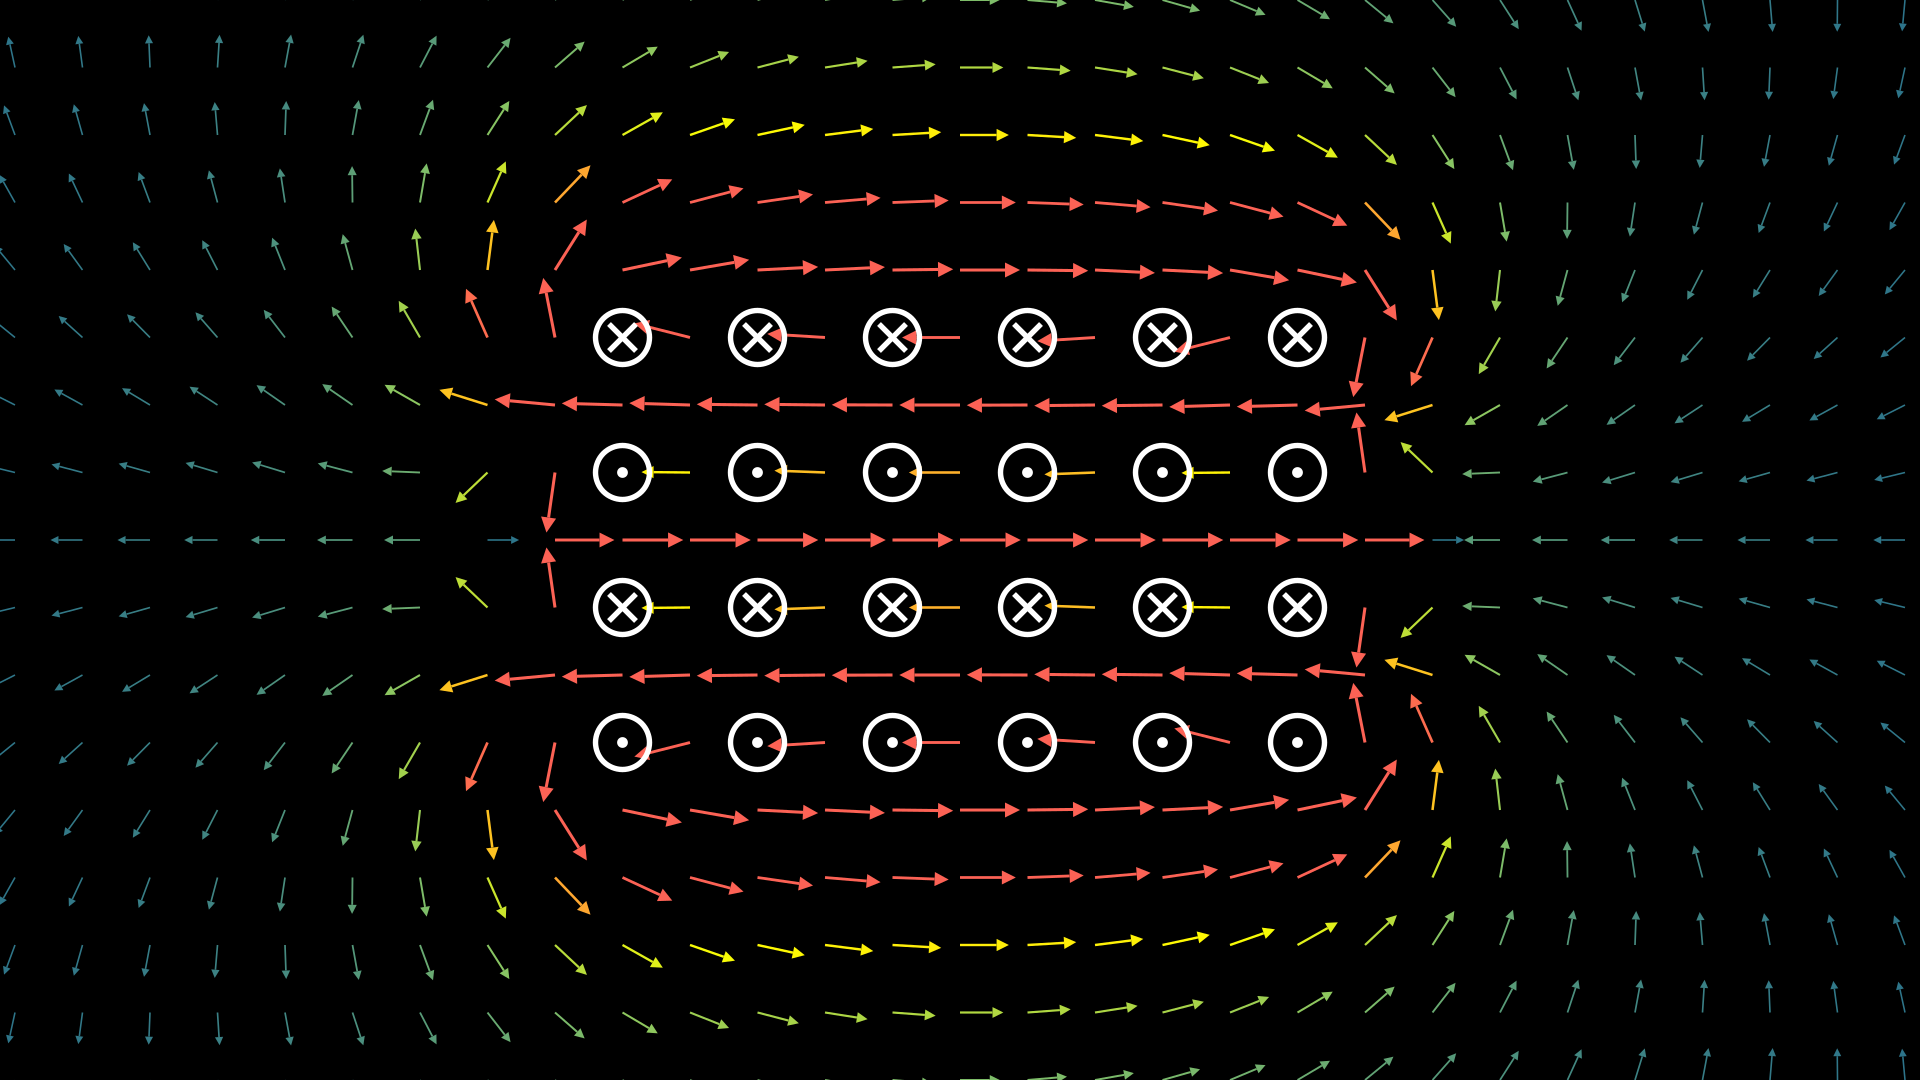

In [49]:
%%manim -qh -v WARNING ElectricFieldExampleScene

class ElectricFieldExampleScene(Scene):
    def construct(self):
        charge00 = Charge(-2, LEFT*2.5 + UP * 1.5)
        charge01 = Charge(-2, LEFT*1.5 + UP * 1.5)
        charge02 = Charge(-2, LEFT*0.5 + UP * 1.5)
        charge03 = Charge(-2, RIGHT*0.5 + UP * 1.5)
        charge04 = Charge(-2, RIGHT*1.5 + UP * 1.5)
        charge05 = Charge(-2, RIGHT*2.5 + UP * 1.5)
        
        charge0 = Charge(2, LEFT*2.5 + UP * 0.5)
        charge1 = Charge(2, LEFT*1.5 + UP * 0.5)
        charge2 = Charge(2, LEFT*0.5 + UP * 0.5)
        charge3 = Charge(2, RIGHT*0.5 + UP * 0.5)
        charge4 = Charge(2, RIGHT*1.5 + UP * 0.5)
        charge5 = Charge(2, RIGHT*2.5 + UP * 0.5)
        
        charge10 = Charge(-2, LEFT*2.5)
        charge11 = Charge(-2, LEFT*1.5)
        charge12 = Charge(-2, LEFT*0.5)
        charge13 = Charge(-2, RIGHT*0.5)
        charge14 = Charge(-2, RIGHT*1.5 + DOWN * 0.5)
        charge15 = Charge(-2, RIGHT*2.5 + DOWN * 0.5)
        
        charge20 = Charge(2, LEFT*2.5 + DOWN * 1.5)
        charge21 = Charge(2, LEFT*1.5 + DOWN * 1.5)
        charge22 = Charge(2, LEFT*0.5 + DOWN * 1.5)
        charge23 = Charge(2, RIGHT*0.5 + DOWN * 1.5)
        charge24 = Charge(2, RIGHT*1.5 + DOWN * 1.5)
        charge25 = Charge(2, RIGHT*2.5 + DOWN * 1.5)
        
        field = ElectricField(charge00, charge01, charge02, charge03, charge04, charge05,
                            charge0, charge1, charge2, charge3, charge4, charge5,
                             charge10, charge11, charge12, charge13, charge14, charge15,
                             charge20, charge21, charge22, charge23, charge24, charge25)
        self.add(field, charge0, charge1, charge2, charge3, charge4, charge5,
                charge10, charge11, charge12, charge13, charge14, charge15,
                charge00, charge01, charge02, charge03, charge04, charge05,
                charge20, charge21, charge22, charge23, charge24, charge25)

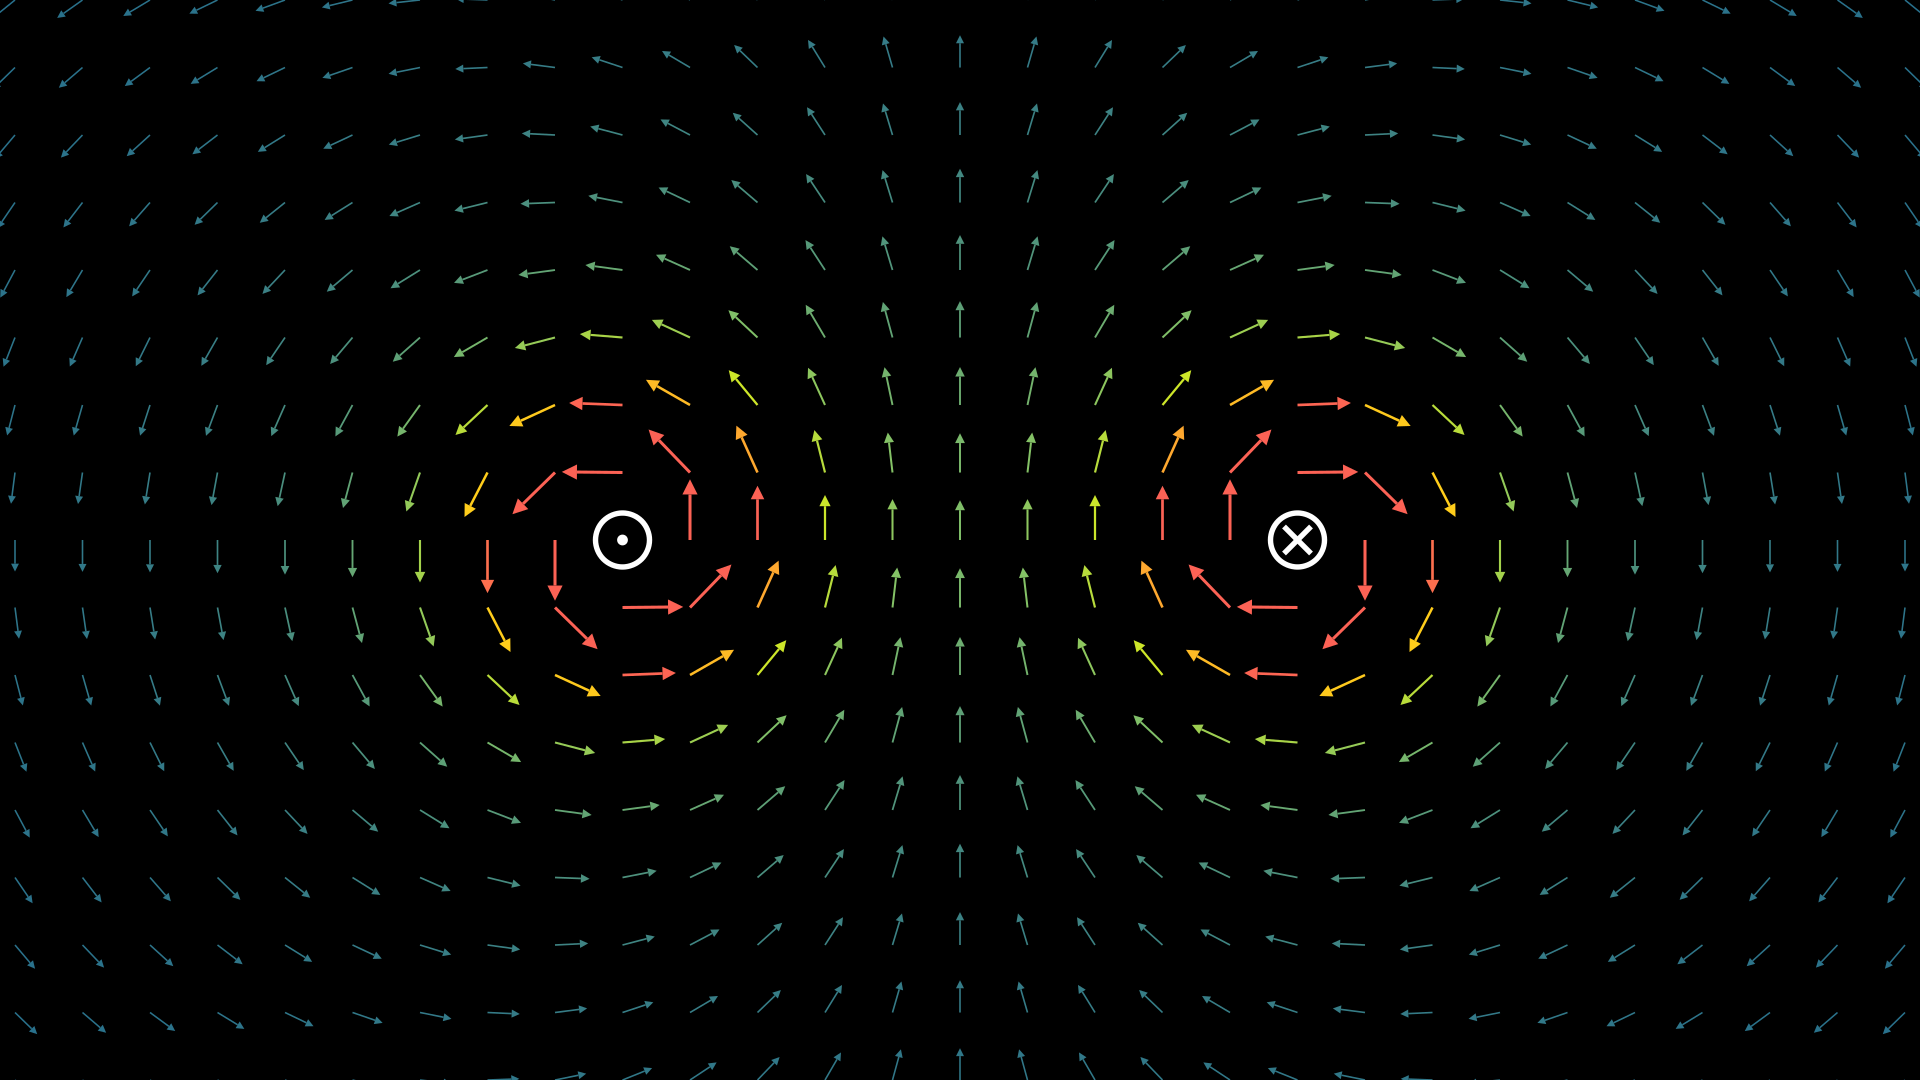

In [71]:
%%manim -qh -v WARNING ElectricFieldExampleScene

class ElectricFieldExampleScene(Scene):
    def construct(self):
        charge1 = Charge(2, LEFT*2.5)
        charge2 = Charge(-2, RIGHT*2.5)
        field = ElectricField(charge1, charge2)
        self.add(charge1)
        self.add(charge2)
        self.add(field)
        
#         func = lambda p: field.field_func(p)
#         stream_lines = StreamLines(func, stroke_width=3, max_anchors_per_line=30)
#         self.add(stream_lines)
#         stream_lines.start_animation(warm_up=False, flow_speed=1.5)
#         self.wait(2)

In [47]:
%%manim -qh -v WARNING ElectricFieldExampleScene

class ElectricFieldExampleScene(Scene):
    def construct(self):
        charge1 = Charge(2, LEFT*2.5)
        charge2 = Charge(-2, RIGHT*2.5)
        field = ElectricField(charge1, charge2)
        self.add(charge1)
        self.add(charge2)
        self.add(field)
        
        func = lambda p: field.field_func(p)
        stream_lines = StreamLines(func, stroke_width=3, max_anchors_per_line=30)
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=1.5)
        self.wait(4)

In [93]:
%%manim -qh -v WARNING ElectricFieldExampleScene

class ElectricFieldExampleScene(Scene):
    def construct(self):
        chargem1 = Charge(2, LEFT*1.75 + UP * 1.5)
        charge0 = Charge(2, LEFT*1.25 + UP * 1.5)
        charge1 = Charge(2, LEFT*0.75 + UP * 1.5)
        charge2 = Charge(2, LEFT*0.25 + UP * 1.5)
        charge3 = Charge(2, RIGHT*0.25 + UP * 1.5)
        charge4 = Charge(2, RIGHT*0.75 + UP * 1.5)
        charge5 = Charge(2, RIGHT*1.25 + UP * 1.5)
        charge6 = Charge(2, RIGHT*1.75 + UP * 1.5)
        
        charge1m1 = Charge(-2, LEFT*1.75 + DOWN * 1.5)
        charge10 = Charge(-2, LEFT*1.25 + DOWN * 1.5)
        charge11 = Charge(-2, LEFT*0.75 + DOWN * 1.5)
        charge12 = Charge(-2, LEFT*0.25 + DOWN * 1.5)
        charge13 = Charge(-2, RIGHT*0.25 + DOWN * 1.5)
        charge14 = Charge(-2, RIGHT*0.75 + DOWN * 1.5)
        charge15 = Charge(-2, RIGHT*1.25 + DOWN * 1.5)
        charge16 = Charge(-2, RIGHT*1.75 + DOWN * 1.5)
        
        field = ElectricField(chargem1, charge0, charge1, charge2, charge3, charge4, charge5,charge6, charge1m1,
                             charge10, charge11, charge12, charge13, charge14, charge15, charge16)
        
        self.add(field, chargem1, charge0, charge1, charge2, charge3, charge4, charge5,charge6,
                charge1m1, charge10, charge11, charge12, charge13, charge14, charge15, charge16)
        
        func = lambda p: field.field_func(p)
        stream_lines = StreamLines(func, stroke_width=2, max_anchors_per_line=15)
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=1.5)
        self.wait(2)

In [77]:
%%manim -qh -v WARNING ElectricFieldExampleScene

class ElectricFieldExampleScene(Scene):
    def construct(self):
        charge00 = Charge(-2, LEFT*1.25 + UP)
        charge01 = Charge(-2, LEFT*0.75 + UP)
        charge02 = Charge(-2, LEFT*0.25 + UP)
        charge03 = Charge(-2, RIGHT*0.25 + UP)
        charge04 = Charge(-2, RIGHT*0.75 + UP)
        charge05 = Charge(-2, RIGHT*1.25 + UP)
        
        charge0 = Charge(2, LEFT*1.25 + UP * 0.5)
        charge1 = Charge(2, LEFT*0.75 + UP * 0.5)
        charge2 = Charge(2, LEFT*0.25 + UP * 0.5)
        charge3 = Charge(2, RIGHT*0.25 + UP * 0.5)
        charge4 = Charge(2, RIGHT*0.75 + UP * 0.5)
        charge5 = Charge(2, RIGHT*1.25 + UP * 0.5)
        
        charge10 = Charge(-2, LEFT*1.25)
        charge11 = Charge(-2, LEFT*0.75)
        charge12 = Charge(-2, LEFT*0.25)
        charge13 = Charge(-2, RIGHT*0.25)
        charge14 = Charge(-2, RIGHT*0.75)
        charge15 = Charge(-2, RIGHT*1.25)
        
        charge20 = Charge(2, LEFT*1.25 + DOWN * 0.5 )
        charge21 = Charge(2, LEFT*0.75 + DOWN * 0.5 )
        charge22 = Charge(2, LEFT*0.25 + DOWN * 0.5 )
        charge23 = Charge(2, RIGHT*0.25 + DOWN * 0.5 )
        charge24 = Charge(2, RIGHT*0.75 + DOWN * 0.5 )
        charge25 = Charge(2, RIGHT*1.25 + DOWN * 0.5 )

#         charge00 = Charge(-2, LEFT*1.5 + UP)
#         charge01 = Charge(-2, LEFT + UP)
#         charge02 = Charge(-2, LEFT*0.5 + UP)
#         charge03 = Charge(-2, ORIGIN + UP)
#         charge04 = Charge(-2, RIGHT*0.5 + UP)
#         charge05 = Charge(-2, RIGHT + UP)
        
#         charge0 = Charge(2, LEFT*1.5 + UP * 0.5)
#         charge1 = Charge(2, LEFT + UP * 0.5)
#         charge2 = Charge(2, LEFT*0.5 + UP * 0.5)
#         charge3 = Charge(2, ORIGIN + UP * 0.5)
#         charge4 = Charge(2, RIGHT*0.5 + UP * 0.5)
#         charge5 = Charge(2, RIGHT + UP * 0.5)
        
#         charge10 = Charge(-2, LEFT*1.5)
#         charge11 = Charge(-2, LEFT)
#         charge12 = Charge(-2, LEFT*0.5)
#         charge13 = Charge(-2, ORIGIN)
#         charge14 = Charge(-2, RIGHT*0.5)
#         charge15 = Charge(-2, RIGHT)
        
#         charge20 = Charge(2, LEFT*1.5 + DOWN * 0.5 )
#         charge21 = Charge(2, LEFT + DOWN * 0.5 )
#         charge22 = Charge(2, LEFT*0.5 + DOWN * 0.5 )
#         charge23 = Charge(2, ORIGIN + DOWN * 0.5 )
#         charge24 = Charge(2, RIGHT*0.5 + DOWN * 0.5 )
#         charge25 = Charge(2, RIGHT + DOWN * 0.5 )
        
        field = ElectricField(charge00, charge01, charge02, charge03, charge04, charge05,
                            charge0, charge1, charge2, charge3, charge4, charge5,
                             charge10, charge11, charge12, charge13, charge14, charge15,
                             charge20, charge21, charge22, charge23, charge24, charge25)
        self.add(field, charge0, charge1, charge2, charge3, charge4, charge5,
                charge10, charge11, charge12, charge13, charge14, charge15,
                charge00, charge01, charge02, charge03, charge04, charge05,
                charge20, charge21, charge22, charge23, charge24, charge25)
        
        func = lambda p: field.field_func(p)
        stream_lines = StreamLines(func, stroke_width=2, max_anchors_per_line=15)
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=1.5)
        self.wait(2)

In [79]:
%%manim -qh -v WARNING ElectricFieldExampleScene

class ElectricFieldExampleScene(Scene):
    def construct(self):
        charge00 = Charge(-2, LEFT*2.25 + UP)
        charge01 = Charge(-2, LEFT*1.75 + UP)
        charge02 = Charge(-2, LEFT*1.25 + UP)
        charge03 = Charge(-2, RIGHT*1.25 + UP)
        charge04 = Charge(-2, RIGHT*1.75 + UP)
        charge05 = Charge(-2, RIGHT*2.25 + UP)
        
        charge0 = Charge(2, LEFT*2.25 + UP * 0.5)
        charge1 = Charge(2, LEFT*1.75 + UP * 0.5)
        charge2 = Charge(2, LEFT*1.25 + UP * 0.5)
        charge3 = Charge(2, RIGHT*1.25 + UP * 0.5)
        charge4 = Charge(2, RIGHT*1.75 + UP * 0.5)
        charge5 = Charge(2, RIGHT*2.25 + UP * 0.5)
        
        charge10 = Charge(-2, LEFT*2.25)
        charge11 = Charge(-2, LEFT*1.75)
        charge12 = Charge(-2, LEFT*1.25)
        charge13 = Charge(-2, RIGHT*1.25)
        charge14 = Charge(-2, RIGHT*1.75)
        charge15 = Charge(-2, RIGHT*2.25)
        
        charge20 = Charge(2, LEFT*2.25 + DOWN * 0.5 )
        charge21 = Charge(2, LEFT*1.75 + DOWN * 0.5 )
        charge22 = Charge(2, LEFT*1.25 + DOWN * 0.5 )
        charge23 = Charge(2, RIGHT*1.25 + DOWN * 0.5 )
        charge24 = Charge(2, RIGHT*1.75 + DOWN * 0.5 )
        charge25 = Charge(2, RIGHT*2.25 + DOWN * 0.5 )

#         charge00 = Charge(-2, LEFT*1.5 + UP)
#         charge01 = Charge(-2, LEFT + UP)
#         charge02 = Charge(-2, LEFT*0.5 + UP)
#         charge03 = Charge(-2, ORIGIN + UP)
#         charge04 = Charge(-2, RIGHT*0.5 + UP)
#         charge05 = Charge(-2, RIGHT + UP)
        
#         charge0 = Charge(2, LEFT*1.5 + UP * 0.5)
#         charge1 = Charge(2, LEFT + UP * 0.5)
#         charge2 = Charge(2, LEFT*0.5 + UP * 0.5)
#         charge3 = Charge(2, ORIGIN + UP * 0.5)
#         charge4 = Charge(2, RIGHT*0.5 + UP * 0.5)
#         charge5 = Charge(2, RIGHT + UP * 0.5)
        
#         charge10 = Charge(-2, LEFT*1.5)
#         charge11 = Charge(-2, LEFT)
#         charge12 = Charge(-2, LEFT*0.5)
#         charge13 = Charge(-2, ORIGIN)
#         charge14 = Charge(-2, RIGHT*0.5)
#         charge15 = Charge(-2, RIGHT)
        
#         charge20 = Charge(2, LEFT*1.5 + DOWN * 0.5 )
#         charge21 = Charge(2, LEFT + DOWN * 0.5 )
#         charge22 = Charge(2, LEFT*0.5 + DOWN * 0.5 )
#         charge23 = Charge(2, ORIGIN + DOWN * 0.5 )
#         charge24 = Charge(2, RIGHT*0.5 + DOWN * 0.5 )
#         charge25 = Charge(2, RIGHT + DOWN * 0.5 )
        
        field = ElectricField(charge00, charge01, charge02, charge03, charge04, charge05,
                            charge0, charge1, charge2, charge3, charge4, charge5,
                             charge10, charge11, charge12, charge13, charge14, charge15,
                             charge20, charge21, charge22, charge23, charge24, charge25)
        self.add(field, charge0, charge1, charge2, charge3, charge4, charge5,
                charge10, charge11, charge12, charge13, charge14, charge15,
                charge00, charge01, charge02, charge03, charge04, charge05,
                charge20, charge21, charge22, charge23, charge24, charge25)
        
        func = lambda p: field.field_func(p)
        stream_lines = StreamLines(func, stroke_width=2, max_anchors_per_line=15)
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=1.5)
        self.wait(2)

In [82]:
%%manim -qh -v WARNING ElectricFieldExampleScene

class ElectricFieldExampleScene(Scene):
    def construct(self):
        
        charge0 = Charge(2, LEFT*3.25 + UP * 0.5)
        charge1 = Charge(2, LEFT*2.75 + UP * 0.5)
        charge4 = Charge(2, RIGHT*2.75 + UP * 0.5)
        charge5 = Charge(2, RIGHT*3.25 + UP * 0.5)
        
        charge10 = Charge(-2, LEFT*3.25)
        charge11 = Charge(-2, LEFT*2.75)
        charge14 = Charge(-2, RIGHT*2.75)
        charge15 = Charge(-2, RIGHT*3.25)
        
        field = ElectricField(charge0, charge1,charge4,charge5,charge10, charge11,charge14,charge15)
        self.add(field, charge0, charge1,charge4,charge5,charge10, charge11,charge14,charge15)
        
        func = lambda p: field.field_func(p)
        stream_lines = StreamLines(func, stroke_width=2, max_anchors_per_line=15)
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=1.5)
        self.wait(2)